### Importing libraries ###

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Checking Working Directory 

In [68]:
import os
print(os.getcwd())

C:\Users\Obinna J. Duruiheme\RFM Analysis\Notebooks


In [69]:
print(os.listdir())

['.ipynb_checkpoints', 'RFM Analysis Solution.ipynb']


### Loading Data

In [70]:
df = pd.read_csv('../Data/bank_data.csv')

### Dataset Exploration 

In [71]:
df.shape

(1041614, 9)

In [72]:
df.head(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0


In [73]:
df.tail(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1041611,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1041612,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0
1041613,T1048567,C8337524,5/3/84,M,PUNE,75734.42,18/9/16,181222,1166.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [75]:
df.nunique()

TransactionID              1041614
CustomerID                  879358
CustomerDOB                  17233
CustGender                       3
CustLocation                  9275
CustAccountBalance          160723
TransactionDate                 55
TransactionTime              81855
TransactionAmount (INR)      92391
dtype: int64

In [76]:
print(df['CustGender'].unique())

['F' 'M' 'T']


In [77]:
print(df['CustGender'].value_counts())

M    760978
F    280635
T         1
Name: CustGender, dtype: int64


In [78]:
print(df['TransactionDate'].unique())

['2/8/16' '1/8/16' '3/8/16' '5/8/16' '4/8/16' '6/8/16' '9/8/16' '8/8/16'
 '12/8/16' '7/8/16' '21/10/16' '16/10/16' '10/8/16' '14/8/16' '17/8/16'
 '21/8/16' '19/8/16' '24/8/16' '22/8/16' '29/8/16' '31/8/16' '22/9/16'
 '23/9/16' '13/8/16' '25/8/16' '28/8/16' '15/8/16' '27/8/16' '20/8/16'
 '23/8/16' '30/8/16' '11/8/16' '16/8/16' '26/8/16' '27/9/16' '18/8/16'
 '25/9/16' '26/9/16' '30/9/16' '3/9/16' '2/9/16' '1/9/16' '6/9/16'
 '5/9/16' '4/9/16' '9/9/16' '8/9/16' '7/9/16' '12/9/16' '11/9/16'
 '10/9/16' '15/9/16' '14/9/16' '13/9/16' '18/9/16']


In [79]:
print(df['TransactionDate'].value_counts())

7/8/16      27084
13/8/16     26738
4/9/16      26420
6/8/16      26416
3/9/16      26292
10/9/16     25628
14/8/16     25407
11/9/16     25355
15/8/16     24020
21/8/16     22833
2/9/16      22718
12/8/16     22277
1/9/16      22179
11/8/16     21674
9/8/16      21673
8/9/16      21648
10/8/16     21457
9/9/16      21444
27/8/16     21349
20/8/16     21188
5/9/16      21116
7/9/16      20999
17/8/16     20960
5/8/16      20949
28/8/16     20944
8/8/16      20883
2/8/16      20787
12/9/16     20611
4/8/16      20535
13/9/16     20506
3/8/16      20446
16/8/16     20278
1/8/16      20277
14/9/16     19845
15/9/16     19610
31/8/16     19586
6/9/16      19510
18/8/16     19338
19/8/16     18559
22/8/16     18441
25/8/16     18424
24/8/16     17893
26/8/16     17615
30/8/16     17273
23/8/16     17239
29/8/16     16700
18/9/16     14622
26/9/16     12376
25/9/16      8127
27/9/16      7401
22/9/16      6925
21/10/16     3641
23/9/16      3460
30/9/16      1935
16/10/16        3
Name: Tran

In [80]:
df.describe(include = 'all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [81]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.041614e+06,1.041614e+06,1.041614e+06
mean,1.149986e+05,1.571221e+05,1.566096e+03
std,8.467609e+05,5.126352e+04,6.561464e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.728140e+03,1.240410e+05,1.600000e+02
50%,1.676852e+04,1.642470e+05,4.575000e+02
75%,5.742885e+04,2.000220e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [82]:
corr = (df.corr())
print(corr)

                         CustAccountBalance  TransactionTime  \
CustAccountBalance                 1.000000        -0.004012   
TransactionTime                   -0.004012         1.000000   
TransactionAmount (INR)            0.062692         0.008296   

                         TransactionAmount (INR)  
CustAccountBalance                      0.062692  
TransactionTime                         0.008296  
TransactionAmount (INR)                 1.000000  


### Data Cleaning 

In [83]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [84]:
# converting TransactionDate and CustomerDOB to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%y')
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')                          

In [85]:
df['TransactionDate'].head(3)

0   2016-08-02
1   2016-08-02
2   2016-08-02
Name: TransactionDate, dtype: datetime64[ns]

In [86]:
df['TransactionDate'].unique()

array(['2016-08-02T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-08-03T00:00:00.000000000', '2016-08-05T00:00:00.000000000',
       '2016-08-04T00:00:00.000000000', '2016-08-06T00:00:00.000000000',
       '2016-08-09T00:00:00.000000000', '2016-08-08T00:00:00.000000000',
       '2016-08-12T00:00:00.000000000', '2016-08-07T00:00:00.000000000',
       '2016-10-21T00:00:00.000000000', '2016-10-16T00:00:00.000000000',
       '2016-08-10T00:00:00.000000000', '2016-08-14T00:00:00.000000000',
       '2016-08-17T00:00:00.000000000', '2016-08-21T00:00:00.000000000',
       '2016-08-19T00:00:00.000000000', '2016-08-24T00:00:00.000000000',
       '2016-08-22T00:00:00.000000000', '2016-08-29T00:00:00.000000000',
       '2016-08-31T00:00:00.000000000', '2016-09-22T00:00:00.000000000',
       '2016-09-23T00:00:00.000000000', '2016-08-13T00:00:00.000000000',
       '2016-08-25T00:00:00.000000000', '2016-08-28T00:00:00.000000000',
       '2016-08-15T00:00:00.000000000', '2016-08-27

In [87]:
# Display in dd/mm/yyyy format
# df['TransactionDate'] = df['TransactionDate'].dt.strftime('%d/%m/%Y')
# df['TransactionDate'].head(3)

In [88]:
# Check how many entries were converted to NaT
print(df['CustomerDOB'].isnull().sum())

0


In [89]:
df['CustomerDOB'].head()

0   1994-10-01
1   2057-04-04
2   1996-11-26
3   2073-09-14
4   1988-03-24
Name: CustomerDOB, dtype: datetime64[ns]

In [90]:
df['CustomerDOB'].unique()

array(['1994-10-01T00:00:00.000000000', '2057-04-04T00:00:00.000000000',
       '1996-11-26T00:00:00.000000000', ...,
       '2065-07-18T00:00:00.000000000', '2042-05-15T00:00:00.000000000',
       '2044-10-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [91]:
# Display in dd/mm/yyyy format
# df['CustomerDOB'] = df['CustomerDOB'].dt.strftime('%d/%m/%Y')
# df['CustomerDOB'].head(3)

In [92]:
df['CustomerDOB'].unique()

array(['1994-10-01T00:00:00.000000000', '2057-04-04T00:00:00.000000000',
       '1996-11-26T00:00:00.000000000', ...,
       '2065-07-18T00:00:00.000000000', '2042-05-15T00:00:00.000000000',
       '2044-10-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [93]:
# Calculating customers age and creating a new column for it
def age_calculation(df):
    df['Age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
    return df

In [94]:
# def parse_dates(date_str):
#     # If the input is already a Timestamp, return it
#     if isinstance(date_str, pd.Timestamp):
#         return date_str
#     # Keep only the date part for strings
#     date_str = str(date_str).split()[0]  # Convert to string and keep only the date part
#     formats = ['%d/%m/%Y', '%d/%m/%y', '%Y-%m-%d', '%m/%d/%Y']
#     for fmt in formats:
#         try:
#             return pd.to_datetime(date_str, format=fmt)
#         except ValueError:
#             continue
#     return pd.NaT  # Return NaT if no formats match

In [95]:
# def age_calculation(df):
#     df['TransactionDate'] = df['TransactionDate'].apply(parse_dates)
#     df['CustomerDOB'] = df['CustomerDOB'].apply(parse_dates)
#     df['Age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
#     return df

In [96]:
# Load the dataset
# df = pd.read_csv('../Data/bank_data.csv')

# Call the function
df = age_calculation(df)

# Display the first three rows
# print(df.head(3))
df.head(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20


In [97]:
# observing the wrong date of birth with negative sign
df[df['Age'] <= 0]['CustomerDOB']

1         2057-04-04
3         2073-09-14
5         2072-08-10
15        2068-10-07
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-05-10
1041591   2071-05-10
1041599   2071-08-21
Name: CustomerDOB, Length: 104836, dtype: datetime64[ns]

In [98]:
# writing a function to correct negative age by adjusting date of birth
def Rewrite_year(date):
    if date.year > 2016:
        date = date.replace(year = date.year -100)
    return date

In [99]:
df['CustomerDOB'] = df['CustomerDOB'].apply(Rewrite_year)

In [100]:
# def age_calculation(df):
#     df['TransactionDate'] = df['TransactionDate'].apply(parse_dates)
#     df['CustomerDOB'] = df['CustomerDOB'].apply(parse_dates)
#     df['Age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
#     return df

In [101]:
# Load the dataset
# df = pd.read_csv('../Data/bank_data.csv')

# Call the function
df = age_calculation(df)

# Display the first three rows
# print(df.head(3))
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


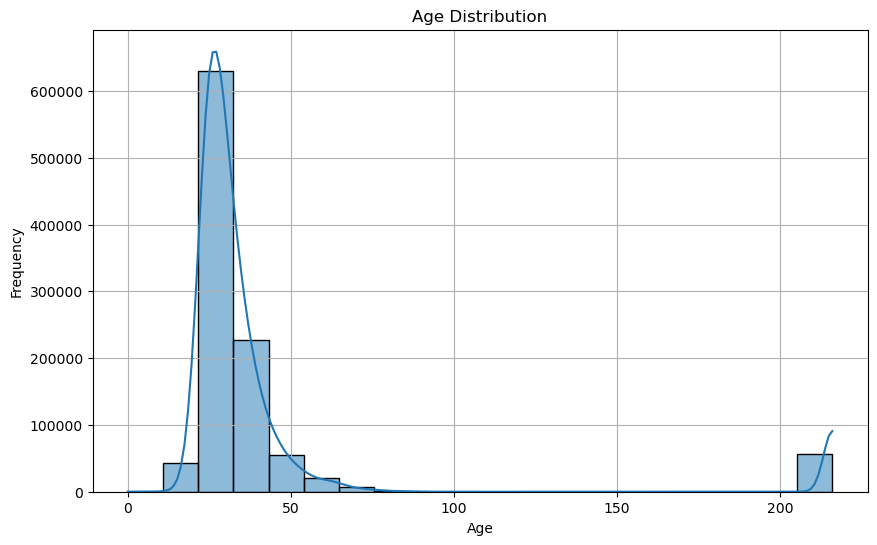

In [102]:
# observing Age distribution using histogram plot

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)  # Use bins to adjust the granularity
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [103]:
df[df['Age']> 100] ['CustomerDOB'].unique()

array(['1800-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [104]:
# Fixing Age outliers 

def age_outlier_correction(df):
    DOB_threshold = 1900
    Age_outliers = df[df['CustomerDOB'].dt.year < DOB_threshold].index
    mean_DOB = df[~df.index.isin(Age_outliers)]['CustomerDOB'].mean()
    df.loc[Age_outliers, 'CustomerDOB'] = mean_DOB
    return df

In [105]:
df = age_outlier_correction(df)
df = age_calculation(df)

In [106]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


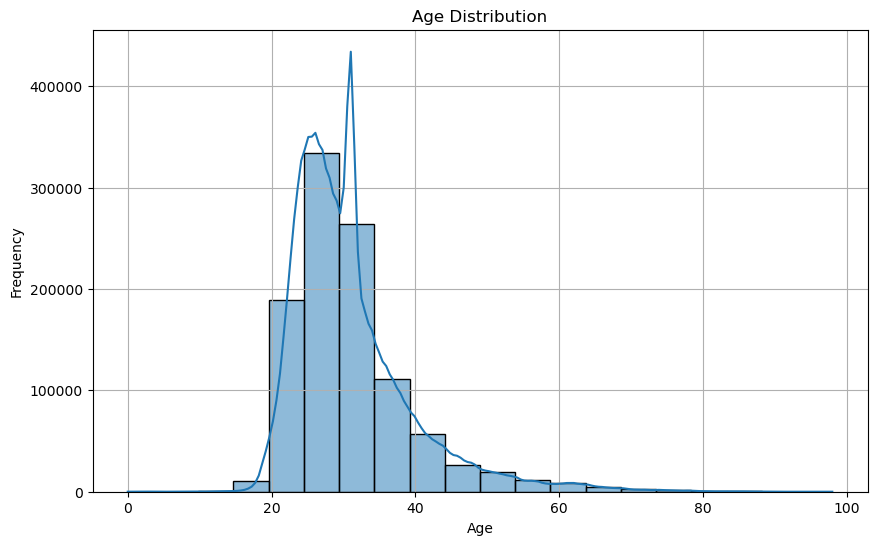

In [107]:
# observing Age distribution using histogram plot

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)  # Use bins to adjust the granularity
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Gender Column

In [108]:
df['CustGender'].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [109]:
# Replacing with T with M

df['CustGender'] = df['CustGender'].replace('T', 'M')
df['CustGender'].value_counts()

M    760979
F    280635
Name: CustGender, dtype: int64

Clean Location Column

In [110]:
df['CustLocation'].unique()

array(['JAMSHEDPUR', 'JHAJJAR', 'MUMBAI', ..., 'KARANJIA',
       'NR HERITAGE FRESH HYDERABAD', 'IMPERIA THANE WEST'], dtype=object)

In [111]:
df['CustLocation'].value_counts()

MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: CustLocation, Length: 9275, dtype: int64

Account balance Column

In [112]:
df['CustAccountBalance'].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

Transaction amount Column

In [113]:
df[df['TransactionAmount (INR)'] == 0].value_counts().sum()

820

In [114]:
df.drop(df[df['TransactionAmount (INR)'] == 0].index.tolist(), axis = 0, inplace = True )

In [115]:
df['CustAccountBalance'].sort_values(ascending = True)

620116            0.0
665191            0.0
931320            0.0
741632            0.0
363443            0.0
             ...     
873636    115035495.1
821032    115035495.1
40727     115035495.1
994478    115035495.1
996102    115035495.1
Name: CustAccountBalance, Length: 1040794, dtype: float64

In [116]:
df[df['TransactionAmount (INR)'] == 0].value_counts().sum()

0

Viewing cleaned data for Analysis

In [117]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


### Exploratory Data Analysis 